In [1]:
from matplotlib import cm
import numpy as np 
import matplotlib.pyplot as plt

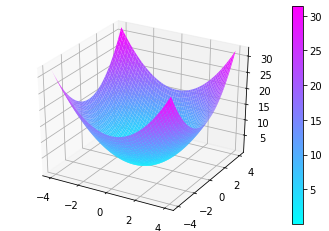

In [7]:
#Grafica 3D de la funcion de coste

fig , ax = plt.subplots(subplot_kw={"projection" : "3d"})

def f(x,y):
  return x**2 + y**2

res = 100

x = np.linspace(-4,4,num = res)
y = np.linspace(-4,4,num = res)

X,Y = np.meshgrid(x,y)

Z = f(X,Y)

surf = ax.plot_surface(X,Y,Z,cmap = cm.cool) #Dibuja el mapa con respecto a los datos de X , Y y Z , ademas le da un tipo de color 
fig.colorbar(surf) 

[-0.00500001 -0.005     ]


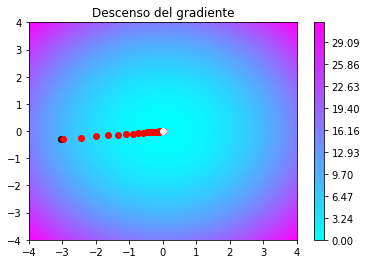

In [28]:
#Curvas de nivel

level_map = np.linspace(np.min(Z),np.max(Z),res)
plt.contourf(X,Y,Z,levels = level_map,cmap = cm.cool) #Dibuja el mapa de curvas de nivel
plt.colorbar()
plt.title("Descenso del gradiente") 

#definimos un punto aleatorio
p = np.random.rand(2) * 8 - 4 #Me devuelve 2 datos aleatorios dentro de 0-1 , lo multiplico por 8 y le resto 4 para tener valores entre -4 a 4
plt.plot(p[0],p[1],'o',c = 'k') #graficamos el punto el cual estara de manera aleatoria

h = 0.01
lr = 0.01 #Es un parametro de ajuste , determina el tamaño del paso a cada iteracion mientras se mueve a un minimo

def derivate(cp , p):
  return (f(cp[0],cp[1]) - f(p[0],p[1])) / h

#Definimos la gradiente para obtener las derivadas parciales 
def gradient(p):
  grad = np.zeros(2) #definimos 2 datos en 0 para inicializarlos
  for idx, val in enumerate(p): #nos regresa el indice y el valor
    cp = np.copy(p)
    cp[idx] = cp[idx] + h #al valor de x le incrementamos un h , tal que quedaria x + h , lo mismo con y

    dp = derivate(cp , p) 
    grad[idx] = dp
  return grad

for i in range(1000):
  p = p - lr*gradient(p)
  if (i % 10 == 0): #Cuando ocurra 10 veces
    plt.plot(p[0],p[1],'o',c = 'r')

plt.plot(p[0],p[1],'o',c = 'w') #Donde se encuentra el punto mas minimo
print(p)